<a href="https://colab.research.google.com/github/KhadijaTasnimMuntaha/Machine-Learning-lab/blob/main/Ransomware%2Cnewdataset_Global_Cybersecurity_Threats_(2015_2024)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
#Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load dataset
df = pd.read_csv('/content/Global_Cybersecurity_Threats_2015-2024.csv') #download and paste here the link from google drive


In [3]:
# Preview shape and column names
print("Dataset loaded successfully.")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())


Dataset loaded successfully.
Shape: (3000, 10)
Columns: ['Country', 'Year', 'Attack Type', 'Target Industry', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used', 'Incident Resolution Time (in Hours)']


In [5]:
df

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
...,...,...,...,...,...,...,...,...,...,...
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9


In [7]:
# Show first few rows
df.head()

df['Attack Type'].value_counts()


df['Target Industry'].value_counts()


df['Attack Source'].value_counts()

,count
Attack Source,
Nation-state,794
Unknown,768
Insider,752
Hacker Group,686


In [10]:
# Drop identifier columns
drop_cols = []

In [11]:
# Create df1 for further analysis
df1 = df.select_dtypes(include=['int64', 'float64'])

In [13]:
# Create df2 for 'Category' prediction
df2 = df.select_dtypes(include=['int64', 'float64'])

In [15]:
# Create df3 for 'Family' prediction
df3 = df.select_dtypes(include=['int64', 'float64'])


print("df1, df2, df3 created successfully:")
print("df1 shape (numerical columns):", df1.shape)
print("df2 shape (numerical columns):", df2.shape)
print("df3 shape (numerical columns):", df3.shape)

df1, df2, df3 created successfully:
df1 shape (numerical columns): (3000, 4)
df2 shape (numerical columns): (3000, 4)
df3 shape (numerical columns): (3000, 4)


In [16]:
#df1, df2, df3 created successfully:
#df1 shape (Class): (21752, 19)
#df2 shape (Category): (21752, 19)
#df3 shape (Family): (21752, 19)

In [17]:
#Binary Class Classification

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [19]:
# 1. Feature-label split
X = df1.drop(columns=['Year'])
y = df1['Year']

In [20]:
# 2. Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [21]:
# 3. Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
# 4. Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}


In [25]:
# 5. Train, Predict, Evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n {name} Metrics:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score :", f1_score(y_test, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 6. Plot ROC Curve (Removed as this is for multiclass classification)
# plt.figure(figsize=(10, 6))
# for name, model in models.items():
#     model.fit(X_train_scaled, y_train)
#     y_pred = model.predict(X_test_scaled)
#     y_prob = model.predict_proba(X_test_scaled)[:, 1]

#     # ROC curve
#     fpr, tpr, _ = roc_curve(y_test, y_prob)
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# # 6. Plot ROC Curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - Class (Benign vs Malware)')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


 Decision Tree Metrics:
Accuracy : 0.09166666666666666
Precision: 0.09070823610287256
Recall   : 0.09166666666666666
F1 Score : 0.09078693610727002
Confusion Matrix:
 [[ 4  6  3  7  5  6  5  5  6  8]
 [ 4  3  5  8  3  6  2 13  9  4]
 [ 8  5 10  5  5  3  9  6  8  5]
 [ 2  6 11  6  3 11  5 10  5  3]
 [ 2  7  5 10  2  6  3  4  4 10]
 [ 4  3 10 10  4  4  8  6  6  8]
 [ 5  6  6  8  4  5  7  8  4  7]
 [ 8  4 12  6  8 10  2  8  2  3]
 [10  7  6  8  9  4  2  8  5  4]
 [ 5  7  8  4  6  7 10  5  2  6]]

 KNN Metrics:
Accuracy : 0.12
Precision: 0.12300326569253663
Recall   : 0.12
F1 Score : 0.11363181374821063
Confusion Matrix:
 [[10 14  7  4  0  3  2  5  5  5]
 [ 7 15  7  7  3  1  6  6  3  2]
 [13  9 10  9  7  5  2  6  2  1]
 [12 12  9 11  2  3  6  2  4  1]
 [11  8  7 11  2  3  2  4  0  5]
 [14 11  8  6  3  5  4  5  5  2]
 [16 10 14  4  4  5  1  2  0  4]
 [10 13 12  6  3  7  2  4  4  2]
 [12  5  8  8  6  2  3  7  9  3]
 [20  6  6  4  3  4  3  3  6  5]]

 Random Forest Metrics:
Accuracy : 0.0916

In [26]:
#ROC Curve for Binary Class Classification

In [27]:
#Multiclass Classification (4 Classes)

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

In [30]:
# 1. Feature-label split
df2_classification = df.select_dtypes(include=['int64', 'float64']).copy()
df2_classification['Attack Type'] = df['Attack Type']

X = df2_classification.drop(columns=['Year', 'Attack Type'])
y = df2_classification['Attack Type']

# 2. Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

# 3. One-hot encode for ROC-AUC (multiclass)
y_binarized = label_binarize(y_encoded, classes=range(len(class_names)))

# 4. Train-test split + scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# 5. Models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}


In [32]:
# 6. Train and Evaluate
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)

    print(f"\n {name} Metrics:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
    print("Recall (macro)   :", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score (macro) :", f1_score(y_test, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



 Decision Tree Metrics:
Accuracy : 0.205
Precision (macro): 0.20310389141788357
Recall (macro)   : 0.20442772304400478
F1 Score (macro) : 0.20360848285738553
Confusion Matrix:
 [[26 14 13 23 17 13]
 [25 13 18 12 14 15]
 [14 13 22 13 16 14]
 [16 13 19 24 17 17]
 [15 15 12 21 17 19]
 [13 17 14 15 20 21]]

 KNN Metrics:
Accuracy : 0.195
Precision (macro): 0.18932803153504607
Recall (macro)   : 0.19289428669277794
F1 Score (macro) : 0.1871651283175352
Confusion Matrix:
 [[37 14 13 19 15  8]
 [26 23 12 14 15  7]
 [26 11 13 12 17 13]
 [28 19 13 20 12 14]
 [22 23 11 20 12 11]
 [28 15 13 13 19 12]]

 Random Forest Metrics:
Accuracy : 0.18
Precision (macro): 0.17930365510275936
Recall (macro)   : 0.17955368888658807
F1 Score (macro) : 0.1791181065538796
Confusion Matrix:
 [[23 15 18 22 14 14]
 [19 18 15 21 18  6]
 [18 15 15 16 17 11]
 [16 17 19 18 19 17]
 [19 13 11 16 19 21]
 [20 20 16 10 19 15]]


<Figure size 1000x600 with 0 Axes>

In [36]:
# Removed ROC AUC calculation due to IndentationError and multiclass classification context.

/tmp/ipython-input-1672411523.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<function matplotlib.pyplot.show(close=None, block=None)>

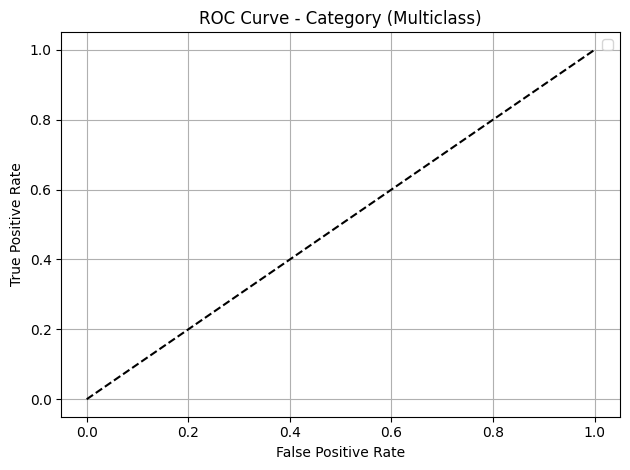

In [37]:
# 7. Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Category (Multiclass)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show

In [38]:
#ROC Curve for 4 class Classification




In [39]:
#Multiclass Classification (14 Classes)

from sklearn.metrics import classification_report


In [41]:
# 1. Feature-label split
df3_classification = df.select_dtypes(include=['int64', 'float64']).copy()
df3_classification['Target Industry'] = df['Target Industry']

X = df3_classification.drop(columns=['Year', 'Target Industry'])
y = df3_classification['Target Industry']

# 2. Label encode
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

# 3. Binarize labels for ROC (optional, mainly for binary or ovr/ovo)
y_binarized = label_binarize(y_encoded, classes=range(len(class_names)))

# 4. Train-test split + scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# 5. Models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}


 Decision Tree Metrics:
Accuracy : 0.14666666666666667
Precision (macro): 0.14757351432258983
Recall (macro)   : 0.146631460600128
F1 Score (macro) : 0.14687683986188907
Confusion Matrix:
 [[14 13  9  8 19 10 16]
 [16 11 11  9 12 13 12]
 [12 11 10  6 22 11  9]
 [12 11 13 13 17 12  8]
 [ 9 17 11 16 14 16 12]
 [12 10 14 12 12 12 13]
 [11 13  8 12 13  9 14]]

Classification Report (Top 5 Classes):
                     precision    recall  f1-score   support

           Banking       0.16      0.16      0.16        89
         Education       0.13      0.13      0.13        84
        Government       0.13      0.12      0.13        81
        Healthcare       0.17      0.15      0.16        86
                IT       0.13      0.15      0.14        95
            Retail       0.14      0.14      0.14        85
Telecommunications       0.17      0.17      0.17        80

          accuracy                           0.15       600
         macro avg       0.15      0.15      0.15       60

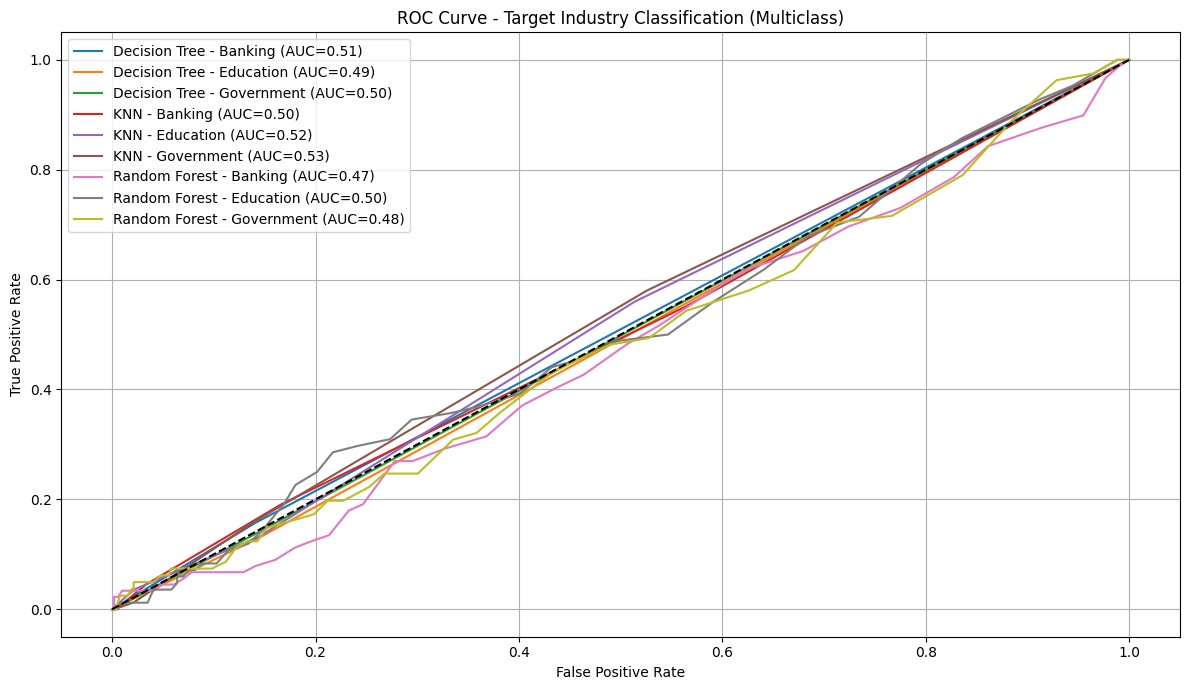

In [45]:
# 6. Train and evaluate
plt.figure(figsize=(12, 7))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)

    print(f"\n {name} Metrics:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
    print("Recall (macro)   :", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score (macro) :", f1_score(y_test, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report (Top 5 Classes):\n", classification_report(
        y_test, y_pred, target_names=class_names, zero_division=0
    )[:800])  # Print shortened version

    # ROC for first 3 classes (One-vs-Rest)
    y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
    for i in range(min(3, len(class_names))):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f'{name} - {class_names[i]} (AUC={auc(fpr, tpr):.2f})')

# 7. Plot ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Target Industry Classification (Multiclass)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
# ROC for first 3 classes
#    y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
#    for i in range(min(3, len(class_names))):
#        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
#        plt.plot(fpr, tpr, label=f'{name} - {class_names[i]} (AUC={auc(fpr, tpr):.2f})')

# 7. Plot ROC
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - Category (Multiclass)')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show

In [47]:
#Roc Curve

